<a href="https://colab.research.google.com/github/sandeepruttala/solar-energy-performance-prediction/blob/main/solar_energy_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU

In [121]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/hcorrect1.csv')
df.head()

,Date,Temperature,Sunshine Duration,Relative Humidity,Shortwave Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Precipitation Total,Cloud Cover Total,Mean Sea level Pressure,Wind speed,Solar energy
0,2018-01-01,26.983492,0.449684,57.692308,309.942498,186.694343,123.248154,0.0,49.461538,1010.200000,10.362319,197578
1,2018-01-02,28.188107,0.650922,53.846154,419.189997,268.350369,150.839628,0.0,29.230769,1010.100000,11.991167,205219
2,2018-01-03,27.362722,0.623847,50.076923,427.719166,274.224414,153.494753,0.0,32.307692,1012.161538,9.485070,210626
3,2018-01-04,27.199645,0.681223,48.923077,419.931663,272.142339,147.789320,0.0,26.523077,1013.115385,7.593981,211361
4,2018-01-05,26.249646,0.864701,50.153846,458.720828,287.111508,171.609316,0.0,0.076923,1011.376923,7.879314,215376


In [122]:
df['Date'] = pd.to_datetime(df['Date'])
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day
# df['DayOfWeek'] = df['Date'].dt.dayofweek
# df.head()

In [123]:
df.isnull().sum()

Date                           0
Temperature                    0
Sunshine Duration              0
Relative Humidity              0
Shortwave Radiation            0
Direct Shortwave Radiation     0
Diffuse Shortwave Radiation    0
Precipitation Total            0
Cloud Cover Total              0
Mean Sea level Pressure        0
Wind speed                     0
Solar energy                   0
dtype: int64

In [124]:
df.describe()

,Temperature,Sunshine Duration,Relative Humidity,Shortwave Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Precipitation Total,Cloud Cover Total,Mean Sea level Pressure,Wind speed,Solar energy
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,30.506449,0.543860,58.813770,422.823498,257.347041,165.476454,0.113657,41.621615,1008.436586,14.491938,198807.699936
std,3.415098,0.309052,12.612190,143.285495,124.864645,26.684175,0.392285,32.662539,4.447436,6.302058,57768.209806
min,18.684261,0.000000,18.307692,37.750833,-0.164323,37.915156,0.000000,0.000000,995.900000,2.220750,0.000000
25%,27.859261,0.249614,50.230769,326.184995,159.212901,150.399596,0.000000,15.665385,1004.523077,9.413881,165435.500000
50%,30.009645,0.666753,57.461538,451.378331,288.139873,168.384178,0.000000,30.000000,1008.830769,14.019829,209321.000000
75%,33.080799,0.793371,66.384615,539.970412,360.701348,185.201046,0.061538,71.000001,1012.211538,19.389128,242018.000000
max,42.166569,0.993761,95.692308,640.132493,420.830998,219.301491,8.207692,100.000000,1018.600000,32.838716,322087.000000


In [125]:
# Select the columns you wish to standardize
columns_to_standardize = ['Temperature', 'Sunshine Duration', 'Relative Humidity']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Now, df will have the selected features standardized
df.head()


,Date,Temperature,Sunshine Duration,Relative Humidity,Shortwave Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Precipitation Total,Cloud Cover Total,Mean Sea level Pressure,Wind speed,Solar energy
0,2018-01-01,-1.031913,-0.304825,-0.088947,309.942498,186.694343,123.248154,0.0,49.461538,1010.200000,10.362319,197578
1,2018-01-02,-0.679068,0.346531,-0.394000,419.189997,268.350369,150.839628,0.0,29.230769,1010.100000,11.991167,205219
2,2018-01-03,-0.920832,0.258895,-0.692952,427.719166,274.224414,153.494753,0.0,32.307692,1012.161538,9.485070,210626
3,2018-01-04,-0.968599,0.444607,-0.784468,419.931663,272.142339,147.789320,0.0,26.523077,1013.115385,7.593981,211361
4,2018-01-05,-1.246865,1.038475,-0.686851,458.720828,287.111508,171.609316,0.0,0.076923,1011.376923,7.879314,215376


In [126]:
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = pd.get_dummies(df, columns=['Month', 'DayOfWeek'], drop_first=True)

# Step 2: Feature Engineering
df['Clearness_Index'] = df['Direct Shortwave Radiation'] / df['Shortwave Radiation']

# Step 3: Correlation Analysis
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Solar energy'].sort_values()

df.head()

<ipython-input-126-ac798857ee4a>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Date,Temperature,Sunshine Duration,Relative Humidity,Shortwave Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Precipitation Total,Cloud Cover Total,Mean Sea level Pressure,...,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Clearness_Index
0,2018-01-01,-1.031913,-0.304825,-0.088947,309.942498,186.694343,123.248154,0.0,49.461538,1010.200000,...,0,0,0,0,0,0,0,0,0,0.602352
1,2018-01-02,-0.679068,0.346531,-0.394000,419.189997,268.350369,150.839628,0.0,29.230769,1010.100000,...,0,0,0,1,0,0,0,0,0,0.640164
2,2018-01-03,-0.920832,0.258895,-0.692952,427.719166,274.224414,153.494753,0.0,32.307692,1012.161538,...,0,0,0,0,1,0,0,0,0,0.641132
3,2018-01-04,-0.968599,0.444607,-0.784468,419.931663,272.142339,147.789320,0.0,26.523077,1013.115385,...,0,0,0,0,0,1,0,0,0,0.648063
4,2018-01-05,-1.246865,1.038475,-0.686851,458.720828,287.111508,171.609316,0.0,0.076923,1011.376923,...,0,0,0,0,0,0,1,0,0,0.625896


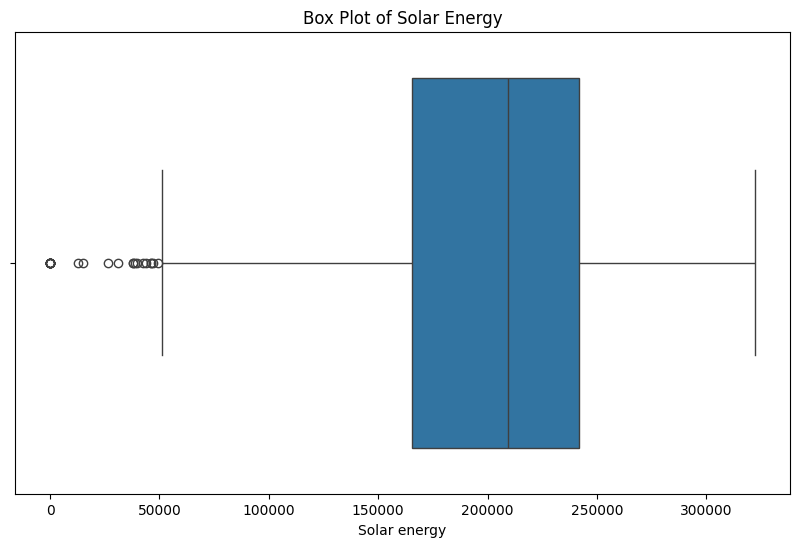

(25, 1.599488163787588)

In [127]:
# Visualizing 'Solar energy' distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Solar energy'])
plt.title('Box Plot of Solar Energy')
plt.show()

# Calculate IQR
Q1 = df['Solar energy'].quantile(0.25)
Q3 = df['Solar energy'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['Solar energy'] < (Q1 - 1.5 * IQR)) | (df['Solar energy'] > (Q3 + 1.5 * IQR))]['Solar energy']

# Display outlier counts
outlier_count = outliers.count()
total_count = df['Solar energy'].count()
outlier_percentage = (outlier_count / total_count) * 100

outlier_count, outlier_percentage


In [128]:
# Capping outliers
cap_lower = Q1 - 1.5 * IQR
cap_upper = Q3 + 1.5 * IQR

df['Solar energy Capped'] = df['Solar energy'].apply(lambda x: max(min(x, cap_upper), cap_lower))
df.head()

,Date,Temperature,Sunshine Duration,Relative Humidity,Shortwave Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Precipitation Total,Cloud Cover Total,Mean Sea level Pressure,...,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Clearness_Index,Solar energy Capped
0,2018-01-01,-1.031913,-0.304825,-0.088947,309.942498,186.694343,123.248154,0.0,49.461538,1010.200000,...,0,0,0,0,0,0,0,0,0.602352,197578.0
1,2018-01-02,-0.679068,0.346531,-0.394000,419.189997,268.350369,150.839628,0.0,29.230769,1010.100000,...,0,0,1,0,0,0,0,0,0.640164,205219.0
2,2018-01-03,-0.920832,0.258895,-0.692952,427.719166,274.224414,153.494753,0.0,32.307692,1012.161538,...,0,0,0,1,0,0,0,0,0.641132,210626.0
3,2018-01-04,-0.968599,0.444607,-0.784468,419.931663,272.142339,147.789320,0.0,26.523077,1013.115385,...,0,0,0,0,1,0,0,0,0.648063,211361.0
4,2018-01-05,-1.246865,1.038475,-0.686851,458.720828,287.111508,171.609316,0.0,0.076923,1011.376923,...,0,0,0,0,0,1,0,0,0.625896,215376.0


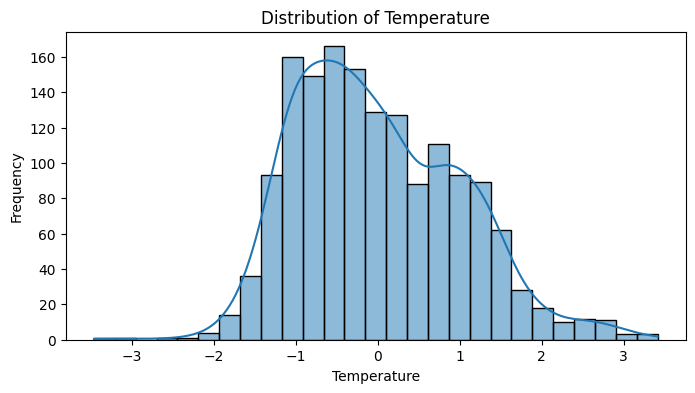

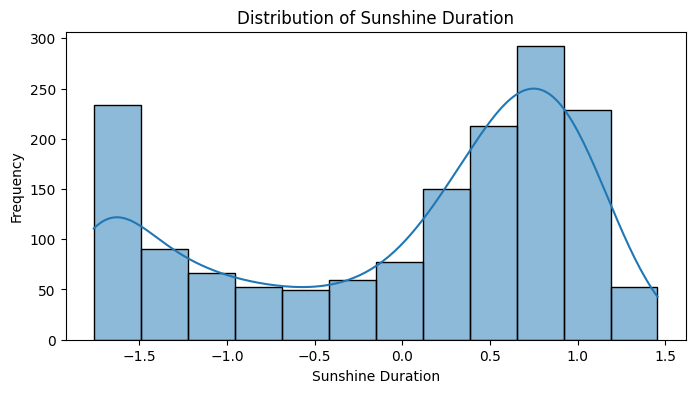

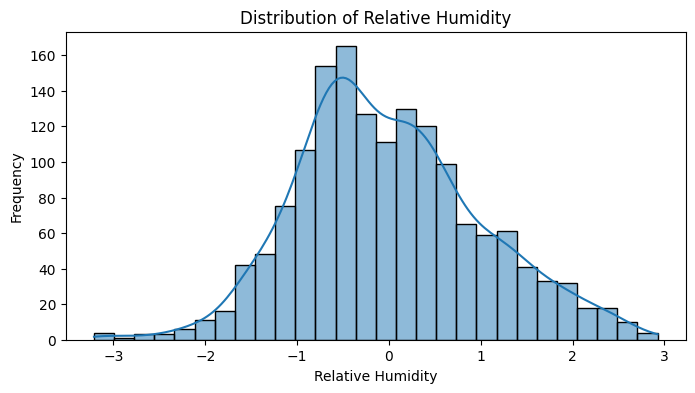

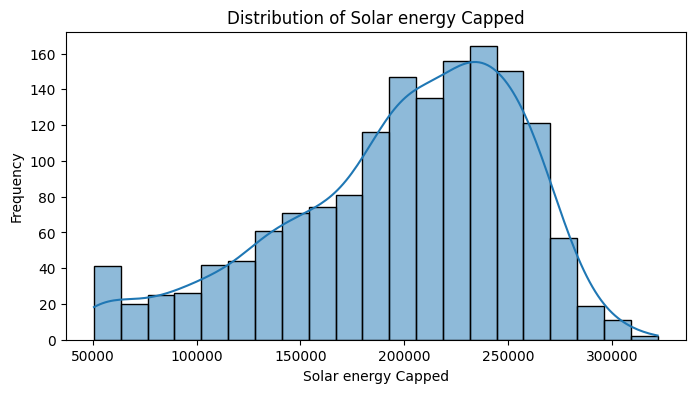

In [129]:
# Histograms for continuous features
for column in ['Temperature', 'Sunshine Duration', 'Relative Humidity', 'Solar energy Capped']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-130-29c73a73a839>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


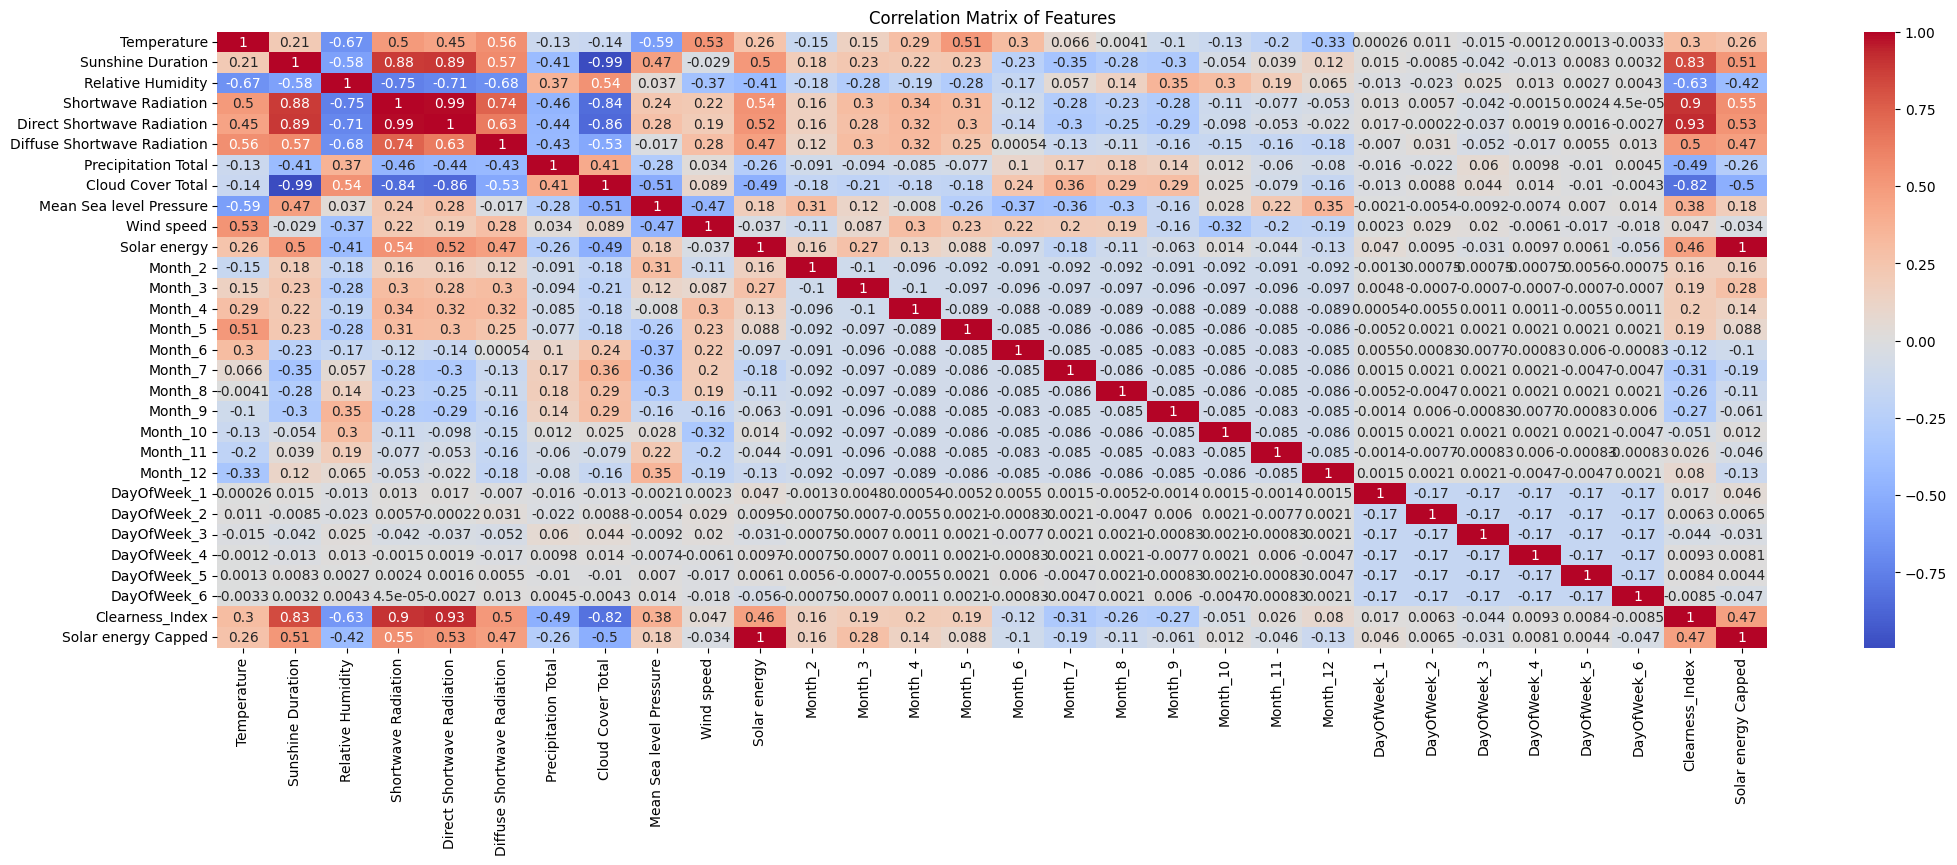

In [130]:
# Correlation matrix
corr_matrix = df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(25, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

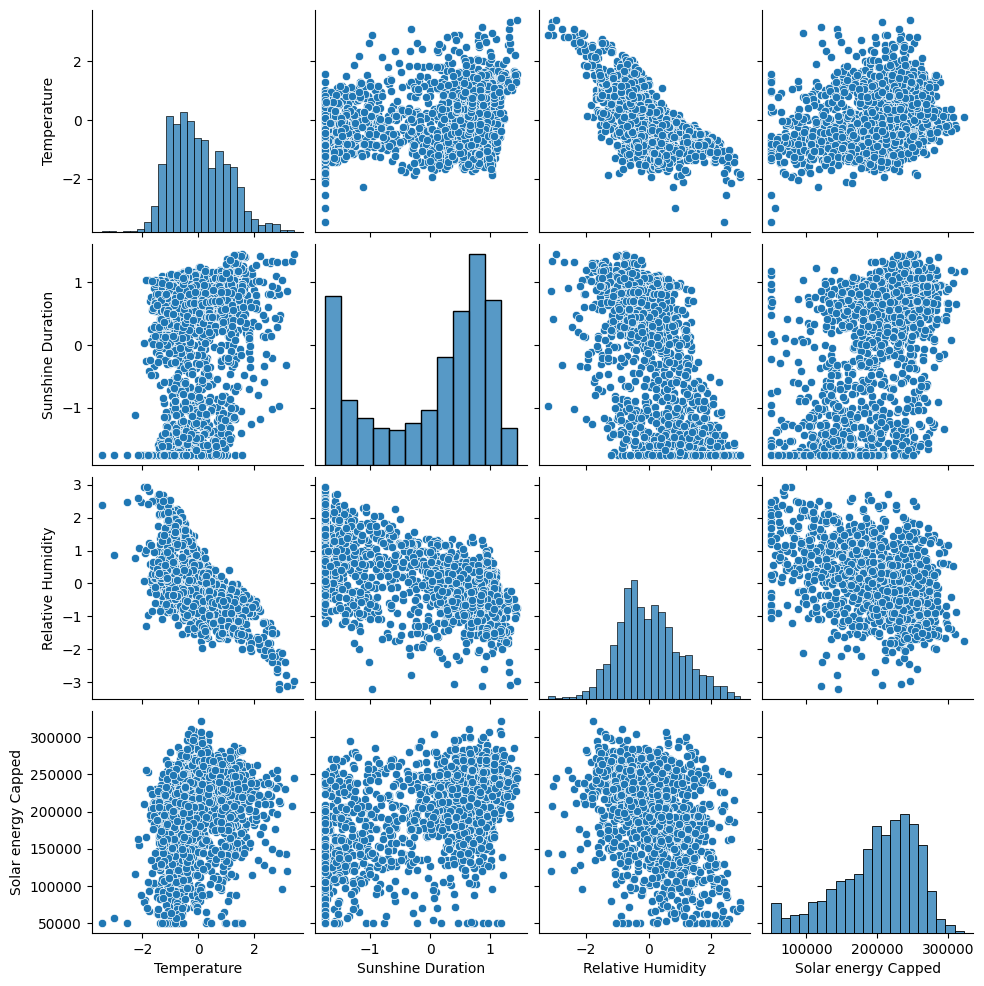

In [131]:
# Pair plot for selected features and the target variable
sns.pairplot(df[['Temperature', 'Sunshine Duration', 'Relative Humidity', 'Solar energy Capped']])
plt.show()

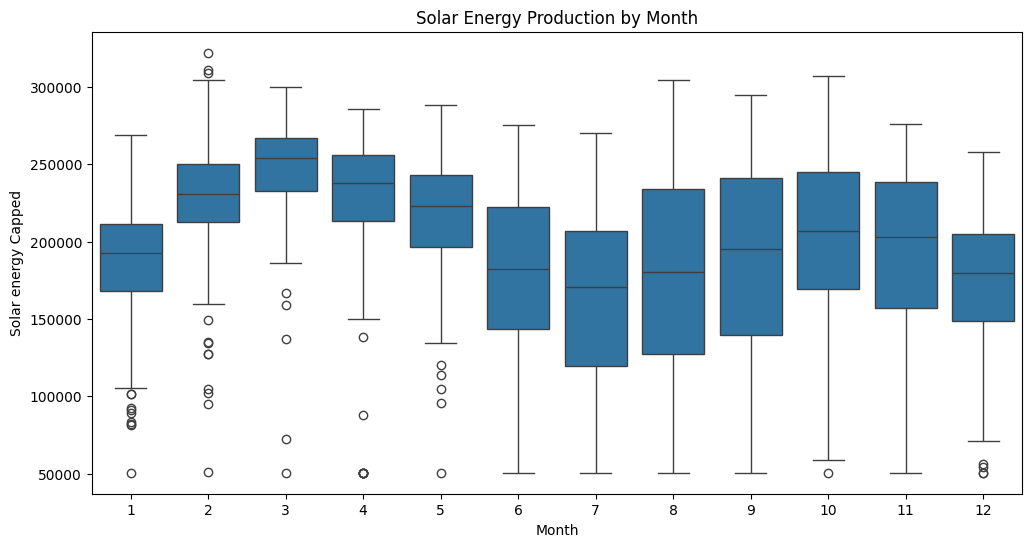

In [132]:
df['Month'] = df['Date'].dt.month.astype('category')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Solar energy Capped', data=df)
plt.title('Solar Energy Production by Month')
plt.show()

# df['Month'] = df['Date'].dt.month
# df['DayOfWeek'] = df['Date'].dt.dayofweek
# df = pd.get_dummies(df, columns=['Month', 'DayOfWeek'], drop_first=True)

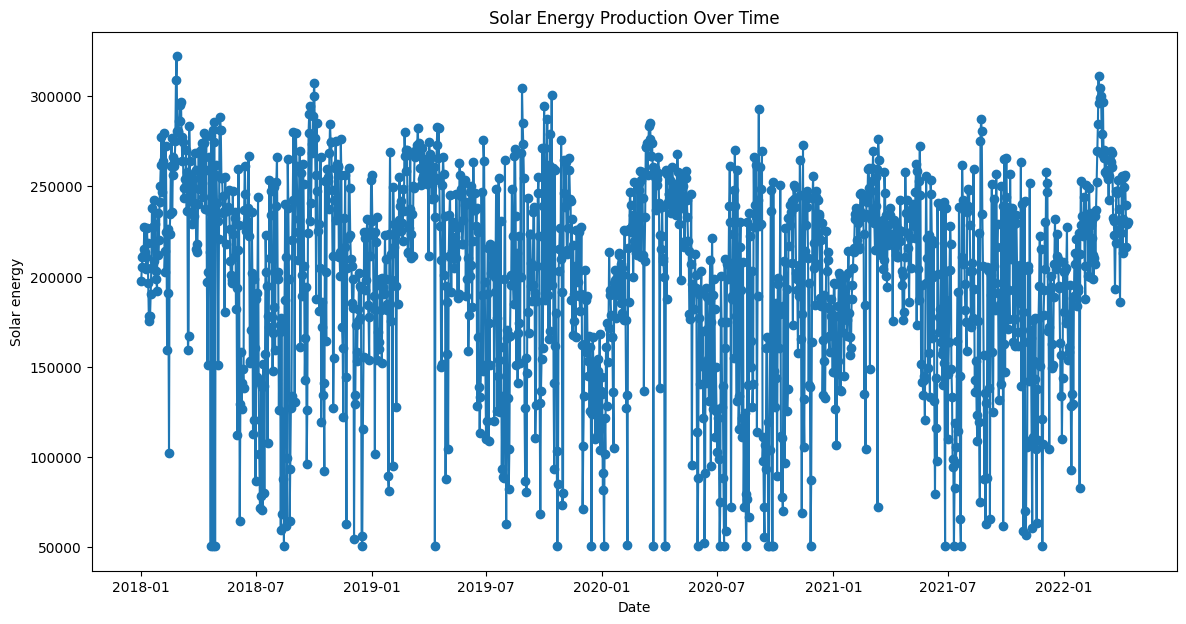

In [133]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Solar energy Capped'], marker='o', linestyle='-')
plt.title('Solar Energy Production Over Time')
plt.xlabel('Date')
plt.ylabel('Solar energy')
plt.show()

In [134]:
# dropping date column
df.drop('Date', axis=1, inplace=True)
# Split the dataset using TimeSeriesSplit
X = np.array(df.drop('Solar energy Capped', axis=1))
y = np.array(df['Solar energy Capped'])

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train your model on X_train, y_train and evaluate it on X_test, y_test
    # Model training and evaluation code here
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
# Assuming X and y are your features and target variable arrays respectively
X = np.array(df.drop('Solar energy Capped', axis=1))
y = np.array(df['Solar energy Capped'])

# Define the number of splits
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train your model on X_train, y_train and evaluate it on X_test, y_test
    # Model training and evaluation code here
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1303, 30) (260, 30)
(1303,) (260,)
(1303, 30) (260, 30)
(1303,) (260,)


In [135]:
# # dropping date column
# df.drop('Date', axis=1, inplace=True)
# X = np.array(df.drop('Solar energy Capped', axis=1))
# y = np.array(df['Solar energy Capped'])
# split_index = int(len(df) * 0.8)
# X_train, X_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]

In [136]:
df.head()

,Temperature,Sunshine Duration,Relative Humidity,Shortwave Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Precipitation Total,Cloud Cover Total,Mean Sea level Pressure,Wind speed,...,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Clearness_Index,Solar energy Capped,Month
0,-1.031913,-0.304825,-0.088947,309.942498,186.694343,123.248154,0.0,49.461538,1010.200000,10.362319,...,0,0,0,0,0,0,0,0.602352,197578.0,1
1,-0.679068,0.346531,-0.394000,419.189997,268.350369,150.839628,0.0,29.230769,1010.100000,11.991167,...,0,1,0,0,0,0,0,0.640164,205219.0,1
2,-0.920832,0.258895,-0.692952,427.719166,274.224414,153.494753,0.0,32.307692,1012.161538,9.485070,...,0,0,1,0,0,0,0,0.641132,210626.0,1
3,-0.968599,0.444607,-0.784468,419.931663,272.142339,147.789320,0.0,26.523077,1013.115385,7.593981,...,0,0,0,1,0,0,0,0.648063,211361.0,1
4,-1.246865,1.038475,-0.686851,458.720828,287.111508,171.609316,0.0,0.076923,1011.376923,7.879314,...,0,0,0,0,1,0,0,0.625896,215376.0,1


In [137]:
# low level models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Performance:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}\n")

Linear Regression Performance:
MAE: 1553.1591270224778
RMSE: 1997.2526241487067
MSE: 3989018.0446688947
R2 Score: 0.9986332982718948

Ridge Regression Performance:
MAE: 1550.151339007779
RMSE: 1998.3215563390447
MSE: 3993289.042529302
R2 Score: 0.9986318349593474

Lasso Regression Performance:
MAE: 1551.6495274425135
RMSE: 1998.1629957707855
MSE: 3992655.35766768
R2 Score: 0.9986320520699711

Elastic Net Regression Performance:
MAE: 1424.7225362629886
RMSE: 1862.906880951097
MSE: 3470422.047094945
R2 Score: 0.9988109776000241



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+10, tolerance: 4.198e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e+10, tolerance: 4.198e+08
  model = cd_fast.enet_coordinate_descent(


In [138]:
# random forest
# Initialize the Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the performance metrics
print("Random Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R^2 Score: {r2_rf}")


Random Forest Performance:
Mean Absolute Error (MAE): 225.0560384615396
Mean Squared Error (MSE): 460267.6014642307
Root Mean Squared Error (RMSE): 678.430248046349
R^2 Score: 0.9998423049183363


In [139]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")


In [140]:
# Reshape X_train and X_test for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [141]:
# Define the LSTM model with corrected input_shape
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Now, use the reshaped versions for training
lstm_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, verbose=2)

# Predict and Evaluate
y_pred_lstm = lstm_model.predict(X_test_reshaped)
evaluate_model(y_test, y_pred_lstm.flatten())

Epoch 1/20
41/41 - 1s - loss: 39054303232.0000 - 1s/epoch - 35ms/step
Epoch 2/20
41/41 - 0s - loss: 34979995648.0000 - 82ms/epoch - 2ms/step
Epoch 3/20
41/41 - 0s - loss: 30574833664.0000 - 85ms/epoch - 2ms/step
Epoch 4/20
41/41 - 0s - loss: 25393260544.0000 - 88ms/epoch - 2ms/step
Epoch 5/20
41/41 - 0s - loss: 19774095360.0000 - 81ms/epoch - 2ms/step
Epoch 6/20
41/41 - 0s - loss: 14269599744.0000 - 83ms/epoch - 2ms/step
Epoch 7/20
41/41 - 0s - loss: 9442797568.0000 - 92ms/epoch - 2ms/step
Epoch 8/20
41/41 - 0s - loss: 5650329600.0000 - 84ms/epoch - 2ms/step
Epoch 9/20
41/41 - 0s - loss: 3021739008.0000 - 92ms/epoch - 2ms/step
Epoch 10/20
41/41 - 0s - loss: 1439057024.0000 - 87ms/epoch - 2ms/step
Epoch 11/20
41/41 - 0s - loss: 612781440.0000 - 87ms/epoch - 2ms/step
Epoch 12/20
41/41 - 0s - loss: 237807568.0000 - 85ms/epoch - 2ms/step
Epoch 13/20
41/41 - 0s - loss: 93528184.0000 - 81ms/epoch - 2ms/step
Epoch 14/20
41/41 - 0s - loss: 43473260.0000 - 82ms/epoch - 2ms/step
Epoch 15/20
41/4

In [142]:
bi_lstm_model = Sequential([
    Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])
bi_lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
bi_lstm_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, verbose=2)

# Predict and Evaluate
y_pred_bi_lstm = bi_lstm_model.predict(X_test_reshaped)
evaluate_model(y_test, y_pred_bi_lstm.flatten())

Epoch 1/20
41/41 - 4s - loss: 33833828352.0000 - 4s/epoch - 98ms/step
Epoch 2/20
41/41 - 0s - loss: 25139513344.0000 - 106ms/epoch - 3ms/step
Epoch 3/20
41/41 - 0s - loss: 15610048512.0000 - 106ms/epoch - 3ms/step
Epoch 4/20
41/41 - 0s - loss: 7408386560.0000 - 117ms/epoch - 3ms/step
Epoch 5/20
41/41 - 0s - loss: 2394463744.0000 - 116ms/epoch - 3ms/step
Epoch 6/20
41/41 - 0s - loss: 481687936.0000 - 118ms/epoch - 3ms/step
Epoch 7/20
41/41 - 0s - loss: 73491744.0000 - 108ms/epoch - 3ms/step
Epoch 8/20
41/41 - 0s - loss: 26474448.0000 - 117ms/epoch - 3ms/step
Epoch 9/20
41/41 - 0s - loss: 23406118.0000 - 110ms/epoch - 3ms/step
Epoch 10/20
41/41 - 0s - loss: 23072610.0000 - 110ms/epoch - 3ms/step
Epoch 11/20
41/41 - 0s - loss: 22835478.0000 - 104ms/epoch - 3ms/step
Epoch 12/20
41/41 - 0s - loss: 22581166.0000 - 108ms/epoch - 3ms/step
Epoch 13/20
41/41 - 0s - loss: 22267984.0000 - 114ms/epoch - 3ms/step
Epoch 14/20
41/41 - 0s - loss: 21953536.0000 - 116ms/epoch - 3ms/step
Epoch 15/20
41/41

In [143]:
# Define the GRU model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
gru_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, verbose=2)

# Predict and Evaluate
y_pred_gru = gru_model.predict(X_test_reshaped)
evaluate_model(y_test, y_pred_gru.flatten())  # Assuming evaluate_model is defined


Epoch 1/20
41/41 - 1s - loss: 35794968576.0000 - 1s/epoch - 37ms/step
Epoch 2/20
41/41 - 0s - loss: 26324617216.0000 - 86ms/epoch - 2ms/step
Epoch 3/20
41/41 - 0s - loss: 17398351872.0000 - 80ms/epoch - 2ms/step
Epoch 4/20
41/41 - 0s - loss: 9810326528.0000 - 87ms/epoch - 2ms/step
Epoch 5/20
41/41 - 0s - loss: 4390884864.0000 - 101ms/epoch - 2ms/step
Epoch 6/20
41/41 - 0s - loss: 1464692096.0000 - 84ms/epoch - 2ms/step
Epoch 7/20
41/41 - 0s - loss: 294354656.0000 - 98ms/epoch - 2ms/step
Epoch 8/20
41/41 - 0s - loss: 29481568.0000 - 86ms/epoch - 2ms/step
Epoch 9/20
41/41 - 0s - loss: 23585950.0000 - 83ms/epoch - 2ms/step
Epoch 10/20
41/41 - 0s - loss: 23349986.0000 - 79ms/epoch - 2ms/step
Epoch 11/20
41/41 - 0s - loss: 23155816.0000 - 86ms/epoch - 2ms/step
Epoch 12/20
41/41 - 0s - loss: 22970264.0000 - 82ms/epoch - 2ms/step
Epoch 13/20
41/41 - 0s - loss: 22764286.0000 - 82ms/epoch - 2ms/step
Epoch 14/20
41/41 - 0s - loss: 22544476.0000 - 77ms/epoch - 2ms/step
Epoch 15/20
41/41 - 0s - lo